<a href="https://colab.research.google.com/github/swoo-nam/project_final_team1/blob/main/%EC%9C%A0%EC%98%88%EC%8A%AC_%EB%A6%AC%EB%B7%B0%EB%B6%84%EC%84%9D_%ED%99%95%EC%9E%A5%EC%84%9C%EB%B9%84%EC%8A%A4_1~3_1002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터

In [1]:

# 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd

- 실제 가게 데이터 - ygy_df2_0923 파일의 3000개 데이터 중 id 없는 경우 제외

In [3]:
df2 = pd.read_csv('ygy_df2_sorted_2037.csv')

- 임시 데이터 - 상우님

In [4]:
temporary_df = pd.read_excel('temporary_df.xlsx')

# 1) 유사도 기반 대표 리뷰 분석

- 라벨

In [5]:
neg_short_labels = pd.read_csv('neg_short_labels.csv')

In [6]:
neg_short_labels

,labels
0,맛이 없어요
1,양이 적어요
2,배달이 느려요
3,가격이 비싸요
4,서비스가 별로에요


- 유사도 함수

In [7]:
!pip install transformers

In [8]:
!pip install -U sentence-transformers


In [9]:
# from sentence_transformers import SentenceTransformer
# from sklearn.metrics.pairwise import pairwise_distances
# from sklearn.metrics import jaccard_score
# bert_model = SentenceTransformer('jhgan/ko-sroberta-multitask')

# def evaluate_similarity(label_text, review_text, alpha=0.9): # cosine 가중치 조절
#     label_embedding = bert_model.encode(label_text)
#     review_embedding = bert_model.encode(review_text)

#     # 코사인 유사도
#     cosine_sim = 1 - pairwise_distances([label_embedding], [review_embedding], metric='cosine')[0][0]

#     # 자카드 유사도
#     label_tokens = set(label_text.split())
#     review_tokens = set(review_text.split())
#     jaccard_sim = len(label_tokens.intersection(review_tokens)) / len(label_tokens.union(review_tokens))

#     # 가중 평균 내보기
#     weighted_sim = alpha*cosine_sim + (1 - alpha)*jaccard_sim

#     return weighted_sim

- 유사도 0.5 이상 담기

In [10]:
# from tqdm import tqdm

# neg_short_result = []
# for label in tqdm(neg_short_labels['labels']):
#     for review in df2['REVIEW']:
#         score = evaluate_similarity(review, label)
#         if score >= 0.5:
#             neg_short_result.append({'label': label, 'review': review, 'score': score})

# neg_short_result = pd.DataFrame(neg_short_result)
# neg_short_result

In [11]:
# neg_short_result.to_csv('neg_short_result.csv', index = False)

In [12]:
neg_short_result = pd.read_csv('neg_short_result.csv')
neg_short_result

,Unnamed: 0,label,review,score
0,0,맛이 없어요,너무 짜장면이 싱겁고 무슨 맛인지모르겧네요,0.503212
1,1,맛이 없어요,짜장맛이 그닥.,0.543451
2,2,맛이 없어요,"간이 전체적으로 별로임. 짜장은 밍밍하고, 탕수육 소스는 너무 시어요. 약간 쉰거 ...",0.612800
3,3,맛이 없어요,맛없어요 불어썽요,0.620842
4,4,맛이 없어요,양 괜찮고 배달은 빨랐으나 맛이 너무 없네요.,0.551628
5,5,맛이 없어요,탕수육 너무 누눅해서 별로였어요,0.515559
6,6,맛이 없어요,아. 돈아깝네요. 맛이 없어요 탕수육도 다 식었고 볶음밥도요. 신경써주시길 바랍니다,0.546669
7,7,맛이 없어요,바삭하지가 않네여.,0.578977
8,8,맛이 없어요,탕수육이맛이 별로.,0.530751
9,9,맛이 없어요,맛없어요 짬뽕 맹맹하고 면 불어있고 탕수육 튀김은 말라있고 고기냄새나네요,0.504146


- 라벨 count

In [13]:
short_label_counts = neg_short_result['label'].value_counts()
short_label_counts

맛이 없어요       16
배달이 느려요       7
양이 적어요        6
서비스가 별로에요     3
Name: label, dtype: int64

- 그래프

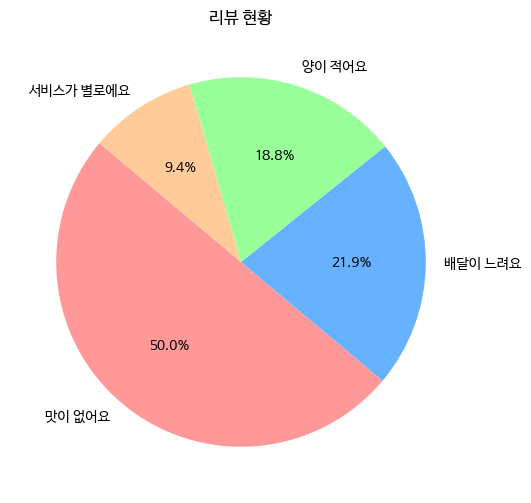

In [14]:
import matplotlib.font_manager
import matplotlib.pyplot as plt

# 파스텔 톤의 색상 설정 (예시)
pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']

plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(6, 6))
plt.pie(short_label_counts[:], labels=short_label_counts[:].index, autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.title('리뷰 현황')
plt.show()

# 2) 긍부정 지수 추이

## temporary df

In [15]:
train = temporary_df

In [16]:
train_pos = train[train['sentiment'] == 1]
train_neg = train[train['sentiment'] == 0]

train_pos.shape, train_neg.shape

((500, 6), (500, 6))

In [17]:

# 부정지수 양수로 바꾸기
def change_score(df):
    if df['sentiment'] == 0:
        return -df['score']
    else:
        return df['score']

train_neg['score'] = train_neg.apply(change_score, axis=1)
train_neg

<ipython-input-17-4c7b67ca05df>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_neg['score'] = train_neg.apply(change_score, axis=1)


,ID,date,review,reply,sentiment,score
0,ae**,2023-07-01,"맛이 별로였어요, 음식이 촉촉하지 않고 식어서 먹기가 좀 그랬네요. 다음에는 안시킬...",죄송합니다. 음식이 맛있지 않았던 점에 대해 정말로 죄송합니다. 저희는 항상 최상의...,0,0.942769
1,ak**,2023-07-02,"맛이 별로였어요, 음식이 촉촉하지 않고 식어서 먹기가 좀 그랬네요. 다음에는 안시킬...","고객님께서는 음식의 맛과 촉감에 대해 불만을 표시해주셨는데, 이는 많이 실망스러워하...",0,0.942769
2,am**,2023-07-03,"맛이 별로였어요, 음식이 촉촉하지 않고 식어서 먹기가 좀 그랬네요. 다음에는 안시킬...",고객님께 불편을 드려 정말 죄송합니다. 담당자에게 알려서 조치를 취하도록 하겠습니다.,0,0.942769
3,ap**,2023-07-04,"맛이 별로였어요, 음식이 촉촉하지 않고 식어서 먹기가 좀 그랬네요. 다음에는 안시킬...",죄송합니다. 다음에는 더 맛있는 음식을 제공하도록 노력하겠습니다.,0,0.942769
4,ar**,2023-07-05,"맛이 별로였어요, 음식이 촉촉하지 않고 식어서 먹기가 좀 그랬네요. 다음에는 안시킬...","안녕하세요, 죄송합니다. 음식이 촉촉하지 않고 식어서 맛이 좋지 않았던 점에 대해 ...",0,0.942769
...,...,...,...,...,...,...
557,b1**,2023-08-08,"맛이 좀 떨어졌어요, 이전에 먹었을 때는 더 맛있었어요",맛이 좀 떨어졌다니 정말 죄송합니다. 이전에는 더 맛있으셨다니 저희도 아쉬워요. 더...,0,0.845809
558,ae**,2023-08-09,배달이 조금 늦어서 기다린 시간이 길었어요. 좀 아쉬웠어요,고객님의 만족을 위해 더 나은 서비스를 제공할 수 있도록 노력하겠습니다. 감사합니다.,0,0.876207
559,ak**,2023-08-10,가성비 좋은 치킨집이라 시켰는데. 치킨은 무난하게 맛있었는데 치킨에 있는 떡을 먹자...,정말 죄송하다는 말씀을 먼저 드립니다 화요일날 아침에 생산된 떡을 전날 발주넣어 받...,0,0.875962
598,eu**,2023-08-19,오늘 처음 먹었는데 배달이 1시간 걸렸어요 밥이랑 찌개 양은 많이 주시네요. 근데 ...,고객님들이 만족하시는 시간 되실 수 있게 노력하겠습니다,0,0.345111


In [18]:

# Datetime 형식으로 바꾸기
train_pos['date'] = pd.to_datetime(train_pos['date'])
train_neg['date'] = pd.to_datetime(train_neg['date'])

# 인덱스 설정해서 7D 단위로 확인
train_pos.set_index('date', inplace=True)
train_neg.set_index('date', inplace=True)

train_pos['score'].resample('7D').sum()

<ipython-input-18-0b0515993ba0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pos['date'] = pd.to_datetime(train_pos['date'])
<ipython-input-18-0b0515993ba0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_neg['date'] = pd.to_datetime(train_neg['date'])


date
2023-07-01     3.322375
2023-07-08     3.279000
2023-07-15     3.164170
2023-07-22     3.261375
2023-07-29     5.589793
2023-08-05     7.875649
2023-08-12    10.838978
2023-08-19     9.161573
2023-08-26    25.336220
2023-09-02    62.183984
2023-09-09    62.903468
2023-09-16    59.315833
2023-09-23    58.283972
2023-09-30     8.383620
Freq: 7D, Name: score, dtype: float64

In [19]:
# 7일 간격으로 데이터 합산한 거 반영하기
pos_7D_score = train_pos['score'].resample('7D').sum().reset_index()
neg_7D_score = train_neg['score'].resample('7D').sum().reset_index()

In [20]:
# 스케일링
def scale_minmax(df):
    min_value = min(df)
    size_value = max(df) - min_value
    return [ (x-min_value)/size_value for x in df]

pos_7D_score['score'] = scale_minmax(pos_7D_score['score'])
neg_7D_score['score'] = scale_minmax(neg_7D_score['score'])
pos_7D_score

,date,score
0,2023-07-01,0.002648
1,2023-07-08,0.001922
2,2023-07-15,0.000000
3,2023-07-22,0.001627
4,2023-07-29,0.040603
5,2023-08-05,0.078867
6,2023-08-12,0.128472
7,2023-08-19,0.100393
8,2023-08-26,0.371147
9,2023-09-02,0.987956


In [21]:
merged_df = pd.merge(pos_7D_score, neg_7D_score, on='date').rename(columns={'date':'date', 'score_x':'pos_7D_score', 'score_y':'neg_7D_score'})
merged_df

,date,pos_7D_score,neg_7D_score
0,2023-07-01,0.002648,0.995610
1,2023-07-08,0.001922,1.000000
2,2023-07-15,0.000000,0.993981
3,2023-07-22,0.001627,0.994567
4,2023-07-29,0.040603,0.770054
5,2023-08-05,0.078867,0.552567
6,2023-08-12,0.128472,0.357109
7,2023-08-19,0.100393,0.465143
8,2023-08-26,0.371147,0.000000


- 2개월 그래프

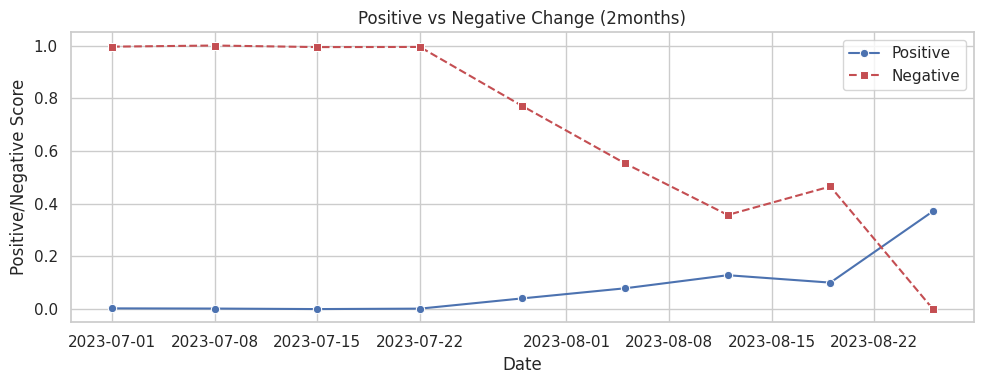

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='NanumBarunGothic')


# 날짜를 Datetime 형식으로 변환
# merged_df['date'] = pd.to_datetime(merged_df['date'])

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 그래프 생성
plt.figure(figsize=(10, 4))  # 그래프 크기 설정

# score 1 그래프 그리기
sns.lineplot(data=merged_df, x='date', y='pos_7D_score', label='Positive', marker='o', linestyle='-', color='b')

# score 2 그래프 그리기
sns.lineplot(data=merged_df, x='date', y='neg_7D_score', label='Negative', marker='s', linestyle='--', color='r')

# 그래프 제목과 레이블 설정
plt.title('Positive vs Negative Change (2months)')
plt.xlabel('Date')
plt.ylabel('Positive/Negative Score')

# 범례 추가
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

## df2

- 3개년 데이터 만들기

In [23]:
df2['YEAR'].value_counts()

mask = (df2['YEAR'] == 2023) |(df2['YEAR'] == 2022) | (df2['YEAR'] == 2021)
df2_3y = df2[mask]

- 긍부정 데이터로 분리

In [24]:
mask = df2_3y['SENTIMENT'] == 1
df2_3y_pos = df2_3y[mask]

In [25]:
mask = df2_3y['SENTIMENT'] == 0
df2_3y_neg = df2_3y[mask]

In [26]:
df2_3y_pos['DATE'] = pd.to_datetime(df2_3y_pos['DATE'])
df2_3y_pos_date = df2_3y_pos.set_index('DATE')
df2_3y_pos_date

<ipython-input-26-13db6f4b927d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_3y_pos['DATE'] = pd.to_datetime(df2_3y_pos['DATE'])


,YEAR,MONTH,DAY,ID,REVIEW,SENTIMENT,SCORE,OWNER_REPLY,RATING
DATE,,,,,,,,,
2021-01-01,2021,1,1,tl**,감사합니다 맛잘먹습니다,1,0.710724,안녕하세요! 고객님의 리뷰는 사랑입니다 ~ 하룻동안 쌓였던 피로가 싹~가실정도로 행...,5
2021-01-02,2021,1,2,ca**,앞으로 자주 먹을게요~ 방금도 또 주문했어요~,1,0.784846,안녕하세요~ 맛있게 드셔주시니 몸둘바를 모르겠습니다! 항상 정직한 재료와 정성으로 ...,5
2021-01-02,2021,1,2,ca**,리뷰 연이어 바로 남겨요! 맛있구 배달도 빨라요! 포장도 꼼꼼히 해주셔서 감사해요~,1,0.821913,안녕하세요 맛있게 드다니 너무 기쁩니다. 항상 기대하고 주문하시는 소중한 한끼! 앞...,5
2021-01-04,2021,1,4,su**,처음 시켜먹었는데요 짬뽕도 면대신 밥으로 요청한데로 해주셨구요 짬뽕국물이 깔끔칼칼 ...,1,0.889598,안녕하세요! 최고의 리뷰 감사합니다 ~ 맛있게 드시고 이렇게 소중한 리뷰까지 정말 ...,5
2021-01-04,2021,1,4,ro**,짱 맛있어용,1,0.743814,안녕하세요~ 소중한 리뷰 감사합니다! 고객님들의 리뷰를 보고 항상 힘을 얻는답니다~...,5
...,...,...,...,...,...,...,...,...,...
2023-09-22,2023,9,22,is**,짬뽕은 역시 금문도,1,0.569275,사장댓글없음,5
2023-09-22,2023,9,22,ri**,맛은 두 말할것 없이 맛있고 포장도 흐르지 않으면서도 까기도 편하게 주셔서 감동했습...,1,0.884780,사장댓글없음,5
2023-09-22,2023,9,22,hs**,맛있어요! 오늘 또 시키려고욤! 유린육? 소스가 맛있어요,1,0.605411,사장댓글없음,5


In [27]:
df2_3y_neg['DATE'] = pd.to_datetime(df2_3y_neg['DATE'])
df2_3y_neg_date = df2_3y_neg.set_index('DATE')
df2_3y_neg_date

<ipython-input-27-616ff50a1515>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_3y_neg['DATE'] = pd.to_datetime(df2_3y_neg['DATE'])


,YEAR,MONTH,DAY,ID,REVIEW,SENTIMENT,SCORE,OWNER_REPLY,RATING
DATE,,,,,,,,,
2021-01-07,2021,1,7,pr**,점 별루 였어요.,0,0.888765,안녕하세요~ 고객님! 저희 매장를 이용해주셔서 감사드립니다! 고객님의 맛에 별 다섯...,3
2021-01-07,2021,1,7,61**,맛은 괜찮아요 근데 아무리 반반메뉴이더라도 짬뽕양이 한 젓가락도 안되는게 실화입니까?,0,0.860964,안녕하세요~ 고객님! 저희 매장를 이용해주셔서 감사드립니다! 고객님의 맛에 별 다섯...,3
2021-01-11,2021,1,11,as**,자장면 무난하니 괜찮아요,0,0.446055,안녕하세요! 소중한 리뷰 감사합니다 언제나 신선하고 맛있는 요리로 찾아뵙도록 하겠습...,4
2021-01-11,2021,1,11,mk**,왜 낙지삼겹살김치덮밥인지. 삼겹살은 없는데. 짬뽕이나 팔보채를 먹을때 해물이 듬북들...,0,0.554879,안녕하세요! 기대하시고 주문하셨을텐데 많이 속상하셨겠어요 앞으로 하나하나 꼼꼼히 체...,3
2021-01-20,2021,1,20,vi**,우선 면을 미리해두신것 같고요 많이 불어서 왔습니다.코로나 로 힘드실테고 다음에 더...,0,0.761520,안녕하세요! 최고의 리뷰 감사합니다 ~ 맛있게 드시고 이렇게 소중한 리뷰까지 정말 ...,5
...,...,...,...,...,...,...,...,...,...
2023-08-23,2023,8,23,he**,찹쌀탕수육 안좋아하는데 찹쌀탕수육으로 왓어요 가격이 더비싼걸 떠나서 찹쌀보다 옛날탕...,0,0.596221,사장댓글없음,5
2023-09-09,2023,9,9,ra**,맛없어요 멀리까지 포장하러 간건데 매우 실망했어요.,0,0.929129,사장댓글없음,1
2023-09-10,2023,9,10,ur**,시 분 주문 도착 시 분 음식 다 식고 면 퍼지고 요청도 안 한 일회용품은 넣어주...,0,0.996458,사장댓글없음,1


- pos, neg 기간 맞춰주기 처리

In [28]:
first_row = df2_3y_neg_date.iloc[0,:]
first_row = pd.DataFrame([first_row])
first_row.index = ['2021-01-01']
first_row

,YEAR,MONTH,DAY,ID,REVIEW,SENTIMENT,SCORE,OWNER_REPLY,RATING
2021-01-01,2021,1,7,pr**,점 별루 였어요.,0,0.888765,안녕하세요~ 고객님! 저희 매장를 이용해주셔서 감사드립니다! 고객님의 맛에 별 다섯...,3


In [29]:
last_row = df2_3y_neg_date.iloc[-1]
last_row = pd.DataFrame([last_row])
last_row.index = ['2021-09-23']
last_row

,YEAR,MONTH,DAY,ID,REVIEW,SENTIMENT,SCORE,OWNER_REPLY,RATING
2021-09-23,2023,9,18,19**,. .,0,0.477857,사장댓글없음,2


In [30]:
df2_3y_neg_date['Date'] = pd.to_datetime(df2_3y_neg_date['SCORE'], errors='coerce')
df2_3y_neg_date

first_row.index  = pd.to_datetime(first_row.index, errors='coerce')
last_row.index  = pd.to_datetime(last_row.index, errors='coerce')

In [31]:
df2_3y_neg_date = pd.concat([first_row,df2_3y_neg_date])
df2_3y_neg_date = pd.concat([df2_3y_neg_date,last_row])
df2_3y_neg_date

,YEAR,MONTH,DAY,ID,REVIEW,SENTIMENT,SCORE,OWNER_REPLY,RATING,Date
2021-01-01,2021,1,7,pr**,점 별루 였어요.,0,0.888765,안녕하세요~ 고객님! 저희 매장를 이용해주셔서 감사드립니다! 고객님의 맛에 별 다섯...,3,NaT
2021-01-07,2021,1,7,pr**,점 별루 였어요.,0,0.888765,안녕하세요~ 고객님! 저희 매장를 이용해주셔서 감사드립니다! 고객님의 맛에 별 다섯...,3,1970-01-01
2021-01-07,2021,1,7,61**,맛은 괜찮아요 근데 아무리 반반메뉴이더라도 짬뽕양이 한 젓가락도 안되는게 실화입니까?,0,0.860964,안녕하세요~ 고객님! 저희 매장를 이용해주셔서 감사드립니다! 고객님의 맛에 별 다섯...,3,1970-01-01
2021-01-11,2021,1,11,as**,자장면 무난하니 괜찮아요,0,0.446055,안녕하세요! 소중한 리뷰 감사합니다 언제나 신선하고 맛있는 요리로 찾아뵙도록 하겠습...,4,1970-01-01
2021-01-11,2021,1,11,mk**,왜 낙지삼겹살김치덮밥인지. 삼겹살은 없는데. 짬뽕이나 팔보채를 먹을때 해물이 듬북들...,0,0.554879,안녕하세요! 기대하시고 주문하셨을텐데 많이 속상하셨겠어요 앞으로 하나하나 꼼꼼히 체...,3,1970-01-01
...,...,...,...,...,...,...,...,...,...,...
2023-09-09,2023,9,9,ra**,맛없어요 멀리까지 포장하러 간건데 매우 실망했어요.,0,0.929129,사장댓글없음,1,1970-01-01
2023-09-10,2023,9,10,ur**,시 분 주문 도착 시 분 음식 다 식고 면 퍼지고 요청도 안 한 일회용품은 넣어주...,0,0.996458,사장댓글없음,1,1970-01-01
2023-09-13,2023,9,13,kh**,양념이 전체적으로 많이타서 와서 국물은 다 버렸네요 이벤트는 좋아요,0,0.874825,사장댓글없음,3,1970-01-01
2023-09-18,2023,9,18,19**,. .,0,0.477857,사장댓글없음,2,1970-01-01


- pos_7D_score, neg_7D_score

In [32]:
pos_7D_score = df2_3y_pos_date['SCORE'].resample('7D',closed='left').sum().reset_index()
neg_7D_score = df2_3y_neg_date['SCORE'].resample('7D',closed='left').sum().reset_index()


In [33]:
pos_7D_score = pos_7D_score[:-1]
pos_7D_score

,DATE,SCORE
0,2021-01-01,6.586683
1,2021-01-08,8.006700
2,2021-01-15,3.439677
3,2021-01-22,4.754886
4,2021-01-29,3.274048
...,...,...
137,2023-08-18,2.146827
138,2023-08-25,4.561173
139,2023-09-01,3.624412
140,2023-09-08,5.531810


In [34]:
df2_3y_neg_date.index = pd.to_datetime(df2_3y_neg_date.index)

neg_7D_score = df2_3y_neg_date['SCORE'].resample('7D',closed='left').sum().reset_index()
neg_7D_score

,index,SCORE
0,2021-01-01,2.638493
1,2021-01-08,1.000934
2,2021-01-15,0.761520
3,2021-01-22,0.847420
4,2021-01-29,0.399507
...,...,...
137,2023-08-18,0.596221
138,2023-08-25,0.000000
139,2023-09-01,0.000000
140,2023-09-08,2.800412


In [35]:
pos_7D_score.columns = ['DATE','pos_7D_score']
neg_7D_score.columns = ['DATE','neg_7D_score']

merged_df = pd.merge(pos_7D_score, neg_7D_score, on='DATE')
merged_df

,DATE,pos_7D_score,neg_7D_score
0,2021-01-01,6.586683,2.638493
1,2021-01-08,8.006700,1.000934
2,2021-01-15,3.439677,0.761520
3,2021-01-22,4.754886,0.847420
4,2021-01-29,3.274048,0.399507
...,...,...,...
137,2023-08-18,2.146827,0.596221
138,2023-08-25,4.561173,0.000000
139,2023-09-01,3.624412,0.000000
140,2023-09-08,5.531810,2.800412


- 1개월 그래프

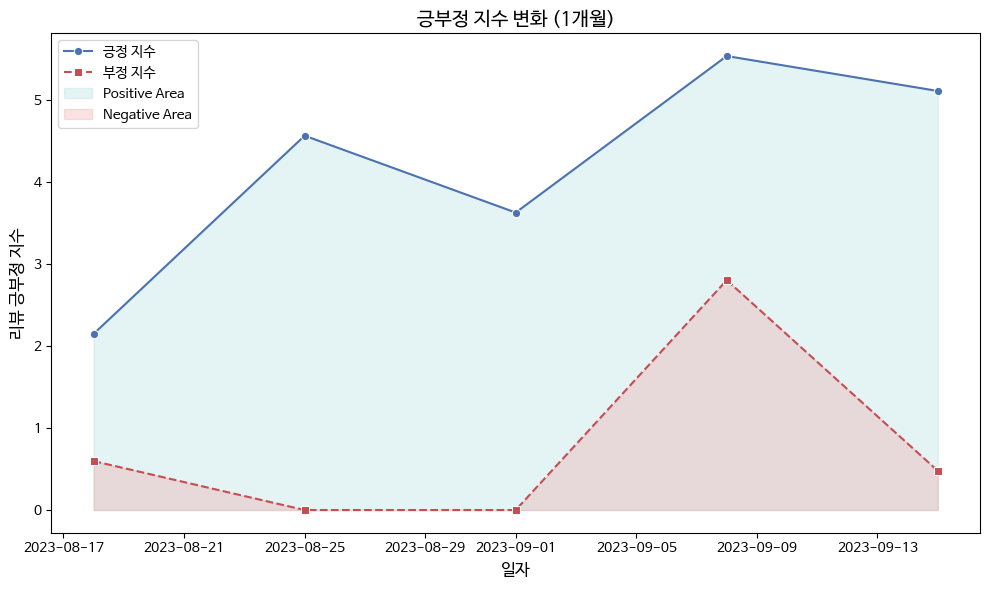

In [36]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='NanumBarunGothic')

# 꺾은선 그래프 그리기
sns.lineplot(data=merged_df.tail(5), x='DATE', y='pos_7D_score', label='긍정 지수', marker='o', linestyle='-', color='b')
sns.lineplot(data=merged_df.tail(5), x='DATE', y='neg_7D_score', label='부정 지수', marker='s', linestyle='--', color='r')

# plt.rcParams.update(plt.rcParamsDefault)
# plt.rc('font', family='NanumBarunGothic')

# 그래프 면적을 색으로 채우기 (양의 부분, 녹색)
plt.fill_between(merged_df.tail(5)['DATE'], merged_df.tail(5)['pos_7D_score'], color='#a8dadc', alpha=0.3, label='Positive Area')

# 그래프 면적을 색으로 채우기 (음의 부분, 붉은색)
plt.fill_between(merged_df.tail(5)['DATE'], merged_df.tail(5)['neg_7D_score'], color='#f1a0a0', alpha=0.3, label='Negative Area')

# 그래프 제목과 레이블 설정
plt.title('긍부정 지수 변화 (1개월)', fontsize=14)
plt.xlabel('일자', fontsize=12)
plt.ylabel('리뷰 긍부정 지수', fontsize=12)

# 범례 추가
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

- 3개년 그래프

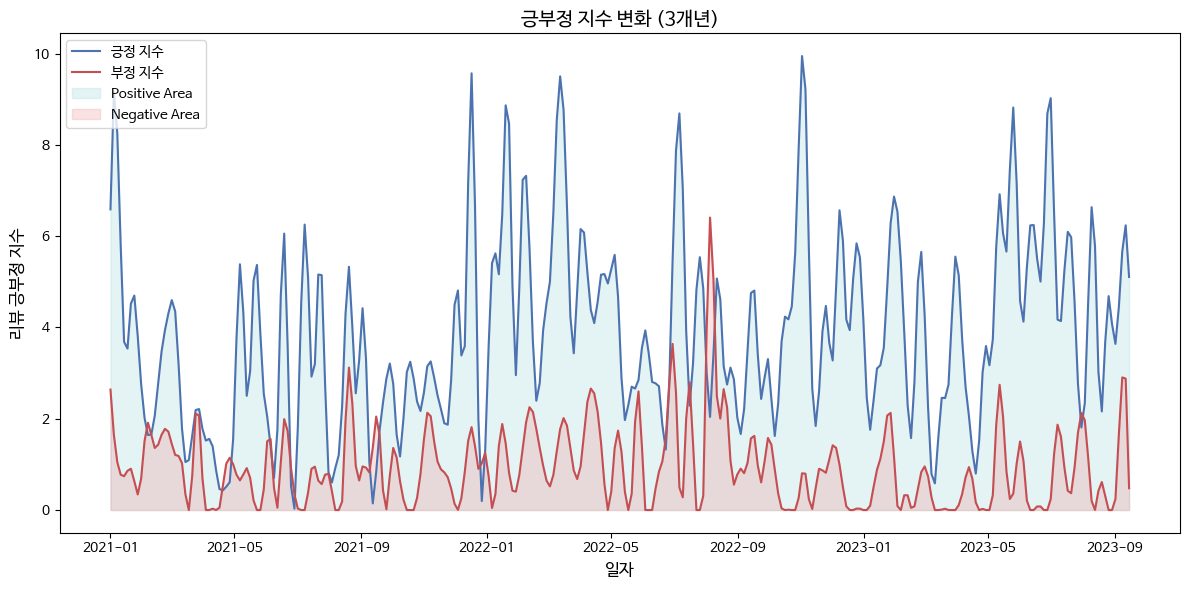

In [37]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# 기존 데이터 포인트
x = merged_df['DATE']
y_pos = merged_df['pos_7D_score']
y_neg = merged_df['neg_7D_score']

plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='NanumBarunGothic')

# 날짜 데이터를 숫자로 변환
x_numeric = pd.to_numeric(x)

# 스플라인 곡선 생성
spline_pos = make_interp_spline(x_numeric, y_pos, k=3)  # k는 스플라인의 차수를 나타냄
spline_neg = make_interp_spline(x_numeric, y_neg, k=3)

# 더 작은 간격으로 나눈 새로운 데이터 포인트
x_new = np.linspace(x_numeric.min(), x_numeric.max(), 300)  # 300개의 데이터 포인트로 나눔

# 부드러운 스플라인 곡선 값 계산
y_pos_smooth = spline_pos(x_new)
y_neg_smooth = spline_neg(x_new)

# 음수 값을 0으로 만들기
y_pos_smooth = np.maximum(y_pos_smooth, 0)
y_neg_smooth = np.maximum(y_neg_smooth, 0)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(x_new), y_pos_smooth, label='긍정 지수', color='b')
plt.plot(pd.to_datetime(x_new), y_neg_smooth, label='부정 지수', color='r')

# 그래프 면적을 색으로 채우기 (양의 부분, 녹색)
plt.fill_between(pd.to_datetime(x_new), y_pos_smooth, color='#a8dadc', alpha=0.3, label='Positive Area')

# 그래프 면적을 색으로 채우기 (음의 부분, 붉은색)
plt.fill_between(pd.to_datetime(x_new), y_neg_smooth, color='#f1a0a0', alpha=0.3, label='Negative Area')

# 그래프 제목과 레이블 설정
plt.title('긍부정 지수 변화 (3개년)', fontsize=14)
plt.xlabel('일자', fontsize=12)
plt.ylabel('리뷰 긍부정 지수', fontsize=12)

# 범례 추가
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()


# 3) 고객별 온도 지수 및 유형 분석

- 부정 지수를 - 로 만들기

In [38]:
df2['NEW_SCORE'] = df2.apply(lambda row: row['SCORE'] if row['SENTIMENT'] == 1 else - row['SCORE'], axis=1)
df2

,DATE,YEAR,MONTH,DAY,ID,REVIEW,SENTIMENT,SCORE,OWNER_REPLY,RATING,NEW_SCORE
0,2019-04-29,2019,4,29,bo**,짬뽕이랑 육개장 시켰는데 너무 맛있게 잘먹었습니다. 둘다 맛나요,1,0.656656,리뷰감사합니다,5,0.656656
1,2019-04-29,2019,4,29,dk**,넘 좋아여 양도 만족하고 맛도 만족하고 배달도 만족해요. 리뷰에 짜장소스 많이 부탁...,1,0.910009,고갭님실망시키지않토록하겠습니다,5,0.910009
2,2019-04-29,2019,4,29,ll**,"탕수육이 다 식어와서 아쉬웠지만 양도 진짜 많고, 짜장면 맛있어요~",1,0.471691,고객님참고하겠습니다,4,0.471691
3,2019-04-30,2019,4,30,ge**,맛있어요!,1,0.523210,굿짱,5,0.523210
4,2019-04-30,2019,4,30,ki**,이사오고 여기로 중국집 정착했습니다. 아이들이 잘 먹어요~ 배달도 빠르구요~,1,0.776512,고객님실망시키지않토록노력하겠습니다,4,0.776512
...,...,...,...,...,...,...,...,...,...,...,...
2032,2023-09-22,2023,9,22,is**,짬뽕은 역시 금문도,1,0.569275,사장댓글없음,5,0.569275
2033,2023-09-22,2023,9,22,ri**,맛은 두 말할것 없이 맛있고 포장도 흐르지 않으면서도 까기도 편하게 주셔서 감동했습...,1,0.884780,사장댓글없음,5,0.884780
2034,2023-09-22,2023,9,22,hs**,맛있어요! 오늘 또 시키려고욤! 유린육? 소스가 맛있어요,1,0.605411,사장댓글없음,5,0.605411
2035,2023-09-22,2023,9,22,hs**,유린기 너무 맛있어요~양이 넘 많아서 덜어 먹었습니당 짬뽕국물도 볶음밥도 맛있어요!,1,0.608382,사장댓글없음,5,0.608382


- 고객 온도지수 그래프 (id: hy**)

In [39]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='NanumBarunGothic')


고객 ID: hy**


<ipython-input-40-7ad302265f77>:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


평균 점수: 0.21846415779807352
리뷰 횟수: 11


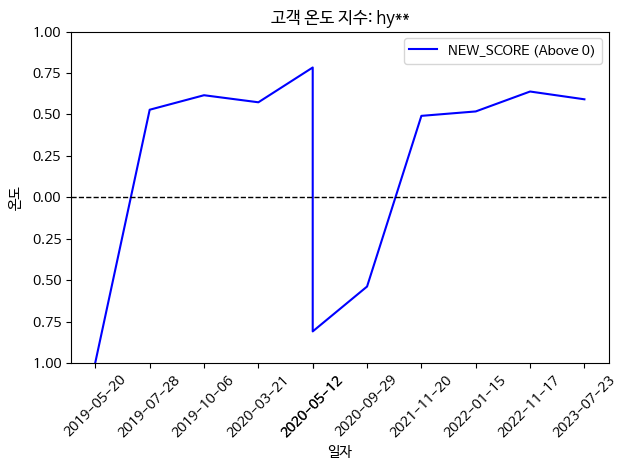

In [40]:
import numpy as np

input_id = input("고객 ID: ")

# 해당 ID에 대한 행 개수 (리뷰 횟수) 계산
review_count = len(df2[df2['ID'] == input_id])

# id_df = temp_df[temp_df['ID'] == input_id]
id_df = df2[df2['ID'] == input_id]

if not id_df.empty:
    # 평균 점수 계산
    mean_score = id_df['NEW_SCORE'].mean()

    # 그래프 선의 색깔을 조건에 따라 지정
    line_color = 'blue' if mean_score >= 0 else 'red'
    line_label = 'NEW_SCORE (Above 0)' if mean_score >= 0 else 'NEW_SCORE (Below 0)'

    plt.plot(id_df['DATE'], id_df['NEW_SCORE'], color=line_color, label=line_label)
    plt.xlabel('일자')
    plt.ylabel('온도')
    plt.title(f'고객 온도 지수: {input_id}')
    plt.xticks(id_df['DATE'], rotation=45)
    plt.tight_layout()

    # y축의 범위를 -1에서 1로 설정합니다.
    plt.ylim(-1, 1)

    # y값이 0인 기준선을 추가합니다.
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

    print(f'평균 점수: {mean_score}')
    print(f'리뷰 횟수: {review_count}')

    plt.legend()
    plt.show()
else:
    print(f"{input_id} : 없는 ID 입니다.")


In [41]:
df2

,DATE,YEAR,MONTH,DAY,ID,REVIEW,SENTIMENT,SCORE,OWNER_REPLY,RATING,NEW_SCORE
0,2019-04-29,2019,4,29,bo**,짬뽕이랑 육개장 시켰는데 너무 맛있게 잘먹었습니다. 둘다 맛나요,1,0.656656,리뷰감사합니다,5,0.656656
1,2019-04-29,2019,4,29,dk**,넘 좋아여 양도 만족하고 맛도 만족하고 배달도 만족해요. 리뷰에 짜장소스 많이 부탁...,1,0.910009,고갭님실망시키지않토록하겠습니다,5,0.910009
2,2019-04-29,2019,4,29,ll**,"탕수육이 다 식어와서 아쉬웠지만 양도 진짜 많고, 짜장면 맛있어요~",1,0.471691,고객님참고하겠습니다,4,0.471691
3,2019-04-30,2019,4,30,ge**,맛있어요!,1,0.523210,굿짱,5,0.523210
4,2019-04-30,2019,4,30,ki**,이사오고 여기로 중국집 정착했습니다. 아이들이 잘 먹어요~ 배달도 빠르구요~,1,0.776512,고객님실망시키지않토록노력하겠습니다,4,0.776512
...,...,...,...,...,...,...,...,...,...,...,...
2032,2023-09-22,2023,9,22,is**,짬뽕은 역시 금문도,1,0.569275,사장댓글없음,5,0.569275
2033,2023-09-22,2023,9,22,ri**,맛은 두 말할것 없이 맛있고 포장도 흐르지 않으면서도 까기도 편하게 주셔서 감동했습...,1,0.884780,사장댓글없음,5,0.884780
2034,2023-09-22,2023,9,22,hs**,맛있어요! 오늘 또 시키려고욤! 유린육? 소스가 맛있어요,1,0.605411,사장댓글없음,5,0.605411
2035,2023-09-22,2023,9,22,hs**,유린기 너무 맛있어요~양이 넘 많아서 덜어 먹었습니당 짬뽕국물도 볶음밥도 맛있어요!,1,0.608382,사장댓글없음,5,0.608382


- 온도를 36.5도 기준으로 스케일링하기

고객 ID: hy**
평균 점수: 0.22
평균 온도: 43.1°C
리뷰 횟수: 11


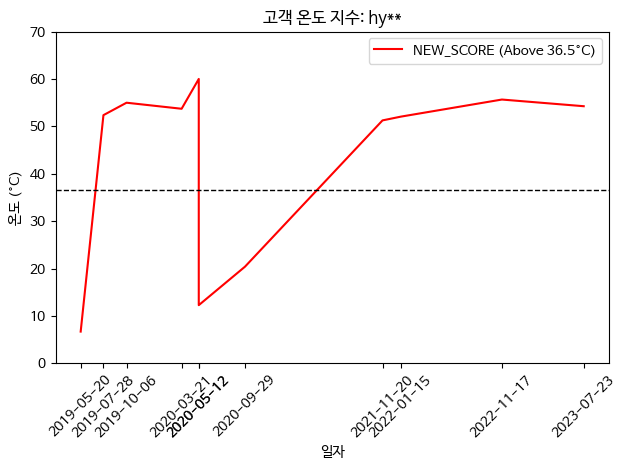

In [64]:
import numpy as np

input_id = input("고객 ID: ")

# 해당 ID에 대한 행 개수 (리뷰 횟수) 계산
review_count = len(df2[df2['ID'] == input_id])

# id_df = temp_df[temp_df['ID'] == input_id]
id_df = df2[df2['ID'] == input_id]

if not id_df.empty:
    # 평균 점수 계산
    mean_score = id_df['NEW_SCORE'].mean()

    # 스케일링 함수 정의
    def scale_temperature(score):
        base_temp = 36.5  # 기준 온도
        ratio = 30  # 0.1 올라갈 때마다 2도 올라가도록 스케일링

        scaled_temp = base_temp + (score * ratio)
        return scaled_temp

    # 스케일링된 온도값 계산
    scaled_scores = id_df['NEW_SCORE'].apply(scale_temperature)

    # 평균 온도 계산
    mean_temperature = scaled_scores.mean()

    # 그래프 선의 색깔을 조건에 따라 지정
    line_color = 'red' if mean_score >= 0 else 'blue'
    line_label = 'NEW_SCORE (Above 36.5°C)' if mean_score >= 0 else 'NEW_SCORE (Below 36.5°C)'

    plt.plot(id_df['DATE'], scaled_scores, color=line_color, label=line_label)
    plt.xlabel('일자')
    plt.ylabel('온도 (°C)')
    plt.title(f'고객 온도 지수: {input_id}')
    plt.xticks(id_df['DATE'], rotation=45)
    plt.tight_layout()

    # y축의 범위를 0에서 80으로 설정합니다.
    plt.ylim(0, 70)

    # y축 눈금 설정
    y_ticks = np.arange(0, 71, 10)  # 0부터 80까지 10도 간격으로 눈금 설정
    plt.yticks(y_ticks)

    # y값이 36.5인 기준선을 추가합니다.
    plt.axhline(y=36.5, color='black', linestyle='--', linewidth=1)

    print(f'평균 점수: {mean_score.round(2)}')
    print(f'평균 온도: {mean_temperature.round(1)}°C')
    print(f'리뷰 횟수: {review_count}')

    plt.legend()
    plt.show()
else:
    print(f"{input_id} : 없는 ID 입니다.")


- 고객 유형화하기

In [43]:
tmp_df2 = df2.groupby('ID').size().reset_index(name='id_count').sort_values(by='id_count', ascending=False)
tmp_df2

,ID,id_count
345,wn**,45
376,zf**,43
72,ch**,43
138,ha**,34
307,sy**,32
...,...,...
269,qd**,1
272,qp**,1
135,gs**,1
277,rg**,1


In [44]:
#활성 기간 추가
df2['DATE'] = pd.to_datetime(df2['DATE'])
review_periods = df2.groupby('ID')['DATE'].agg(['min', 'max'])
review_periods['active_days'] = (review_periods['max'] - review_periods['min']).dt.days

tmp_df2 = pd.merge(tmp_df2, review_periods, on='ID')

#긍정/부정 리뷰 횟수 추가
positive_num = df2.groupby('ID')['SENTIMENT'].sum()

tmp_df2 = pd.merge(tmp_df2, positive_num, on='ID').rename(columns={'SENTIMENT': 'pos_num'})
tmp_df2['neg_num'] = tmp_df2['id_count'] - tmp_df2['pos_num']

# 온도 score 지표들 (sum, mean, median, min, max, std) 추가
score_sum = df2.groupby('ID')['NEW_SCORE'].sum()
tmp_df2 = pd.merge(tmp_df2, score_sum, on='ID').rename(columns={'NEW_SCORE': 'score_sum'})

score_mean = df2.groupby('ID')['NEW_SCORE'].mean()
tmp_df2 = pd.merge(tmp_df2, score_mean, on='ID').rename(columns={'NEW_SCORE': 'score_mean'})

score_median = df2.groupby('ID')['NEW_SCORE'].median()
tmp_df2 = pd.merge(tmp_df2, score_median, on='ID').rename(columns={'NEW_SCORE': 'score_median'})

score_min = df2.groupby('ID')['NEW_SCORE'].min()
tmp_df2 = pd.merge(tmp_df2, score_min, on='ID').rename(columns={'NEW_SCORE': 'score_min'})

score_max = df2.groupby('ID')['NEW_SCORE'].max()
tmp_df2 = pd.merge(tmp_df2, score_max, on='ID').rename(columns={'NEW_SCORE': 'score_max'})

score_std = df2.groupby('ID')['NEW_SCORE'].std()
tmp_df2 = pd.merge(tmp_df2, score_std, on='ID').rename(columns={'NEW_SCORE': 'score_std'})


- 고객 유형화 (K-means 클러스터링) : https://suy379.tistory.com/51

In [45]:
tmp_df2.fillna(0,inplace=True)

In [46]:
X = tmp_df2.iloc[:,1:].drop(columns = ['min','max'])
# 기간 min, max 날짜 형식이라 지움

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#표준화
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
pd.DataFrame(X_scaled) #mean~min, mem_period 5개 변수가 표준화됨.

,0,1,2,3,4,5,6,7,8,9
0,5.883924,1.596871,6.081398,2.208082,6.607878,0.520945,0.578326,-1.041360,0.758193,0.207819
1,5.587469,-0.299840,5.915459,1.483378,3.819023,0.080879,0.041220,-0.678992,0.360391,-0.224113
2,5.587469,1.527837,5.583582,2.932786,5.216440,0.329895,0.479840,-1.234221,0.824361,0.527473
3,4.253425,1.484690,4.587949,0.758674,5.620626,0.694251,0.748806,-1.236008,0.746990,0.282033
4,3.956970,1.312105,3.758255,2.932786,2.814560,0.109622,0.317912,-1.158102,0.686671,0.470934
...,...,...,...,...,...,...,...,...,...,...
379,-0.638072,-0.964292,-0.556154,-0.690733,-0.452574,0.249073,0.096787,0.774462,-0.351863,-0.891487
380,-0.638072,-0.964292,-0.556154,-0.690733,-0.409619,0.578217,0.404834,0.978305,-0.023182,-0.891487
381,-0.638072,-0.964292,-0.556154,-0.690733,-0.331703,1.175254,0.963605,1.348059,0.573017,-0.891487
382,-0.638072,-0.964292,-0.722093,0.033970,-0.745231,-1.993413,-2.001970,-0.614343,-2.591200,-0.891487


- K means 클러스터링 : 유형 갯수 4개 or 5개

In [48]:
#scaled 데이터를 넣어 클러스터링
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(X_scaled)

#클러스터링 변수인 clusters 값을 원본 데이터인 'cc'내에 넣기
X['cluster'] = clusters.labels_
X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id_count,active_days,pos_num,neg_num,score_sum,score_mean,score_median,score_min,score_max,score_std,cluster
0,45,1484,41,4,23.941029,0.532023,0.637544,-0.861264,0.897210,0.385589,3
1,43,385,40,3,14.647847,0.340648,0.387972,-0.606812,0.723971,0.234086,3
2,43,1444,38,5,19.304401,0.448940,0.591781,-0.996690,0.926025,0.497710,3
3,34,1419,32,2,20.651250,0.607390,0.716759,-0.997945,0.892331,0.411620,3
4,32,1319,27,5,11.300721,0.353148,0.516540,-0.943239,0.866063,0.477878,3


- 차원 축소

In [49]:
# from sklearn.decomposition import PCA
# # X = tmp_df2.iloc[:,1:].copy()

# #객체
# pca = PCA(n_components=2)

# #적용
# pca.fit(X_scaled)
# x_pca = pca.transform(X_scaled)
# x_pca

In [50]:
# #x_pca를 보기 쉽게 데이터프레임으로 만들기
# pca_df = pd.DataFrame(x_pca)
# pca_df['cluster'] = X['cluster']
# pca_df.head()

In [51]:
# pca_df.columns = ['feature1', 'feature2','cluster']

In [52]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 'feature0', 'feature1', 'cluster' 열을 사용하여 scatter plot 그리기
# sns.scatterplot(x='feature1', y='feature2', hue='cluster', data=pca_df)

# # 그래프 제목 설정
# plt.title('Clustering Results')

# # 그래프 표시
# plt.show()


In [53]:
# tmp_df2 = pd.concat([tmp_df2,pca_df],axis=1)
tmp_df2['cluster'] = X['cluster']

4개의 고객 유형으로 분류(예시)

- 1) 예비 악성 고객 : 리뷰 1회 이상 5회 미만, 평균 score -1.0~ -0.5 사이
- 2) 일반 고객 : 리뷰 2회 이상 15회 미만, 평균 score -0.5 ~ +0.5 사이
- 3) 예비 단골 고객 : 리뷰 1회 이상 10회 미만, score 0.5 ~ 1.0 사이
- 4) 단골 고객 : 리뷰 15회 이상, 평균 score 0.0~ 1.0 사이

온도를 형상화한 네이밍
- 냉혈 고객 (Cool-Hearted Customers)
- 미지근 고객 (Mildly Warm Customers)
- 따뜻 고객 (Warm Customers)
- 열정 고객 (Passionate Enthusiastic Customers)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


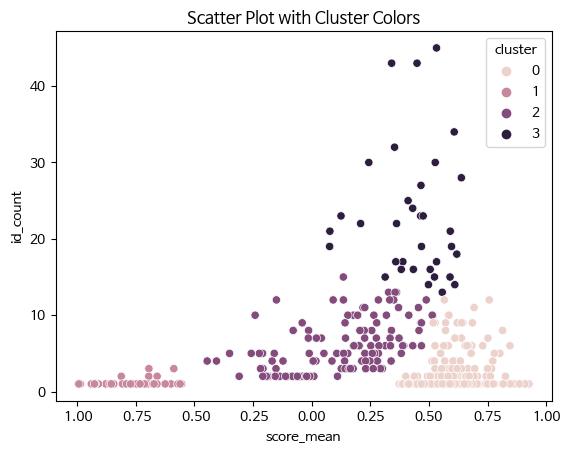

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'new scores mean'을 x축, 'id_count'를 y축으로 지정하고, 'cluster'를 hue로 사용하여 scatter plot 그리기
sns.scatterplot(x='score_mean', y='id_count', hue='cluster', data=tmp_df2)

# 그래프 제목 설정
plt.title('Scatter Plot with Cluster Colors')

# 그래프 표시
plt.show()

- 유형을 예측하기

In [55]:
tmp_df2.columns

Index(['ID', 'id_count', 'min', 'max', 'active_days', 'pos_num', 'neg_num',
       'score_sum', 'score_mean', 'score_median', 'score_min', 'score_max',
       'score_std', 'cluster'],
      dtype='object')

- 신규 ID의 데이터가 추가 되었을 때 유형 예측 : id, 날짜, 리뷰 score, sentiment 데이터 필요함

In [56]:
from datetime import datetime

def get_new_data_new_id(id, date, score, sentiment):
    # 새로운 데이터를 담을 딕셔너리 생성
    new_data = {
        'ID': id,
        'id_count': 1,
        'min': date,
        'max': date,
        'active_days': 1,
        'pos_num': 1 if sentiment == 1 else 0,
        'neg_num': 1 if sentiment == 0 else 1,
        'score_sum': score,
        'score_mean': score,
        'score_median': score,
        'score_min': score,
        'score_max': score,
        'score_std': 0
    }

    # 'min'과 'max'를 datetime 객체로 변환
    new_data['min'] = datetime.strptime(date, '%Y-%m-%d')
    new_data['max'] = datetime.strptime(date, '%Y-%m-%d')

    # 'active_days' 계산
    new_data['active_days'] = (new_data['max'] - new_data['min']).days

    # 새로운 데이터프레임 생성
    new_df = pd.DataFrame([new_data])
    new_df = new_df.drop(columns=['ID','min','max'], axis=1)

    return new_df



In [57]:

# 테스트
new_id = 'newcus**'
new_date = '2023-10-13'
new_score = -0.59
sentiment = 0
new_df = get_new_data_new_id(new_id, new_date, new_score, sentiment)

new_data_cluster_labels = kmeans.predict(new_df)

print('새로운 클러스터의 유형 :', new_data_cluster_labels)
new_df


새로운 클러스터의 유형 : [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,id_count,active_days,pos_num,neg_num,score_sum,score_mean,score_median,score_min,score_max,score_std
0,1,0,0,1,-0.59,-0.59,-0.59,-0.59,-0.59,0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


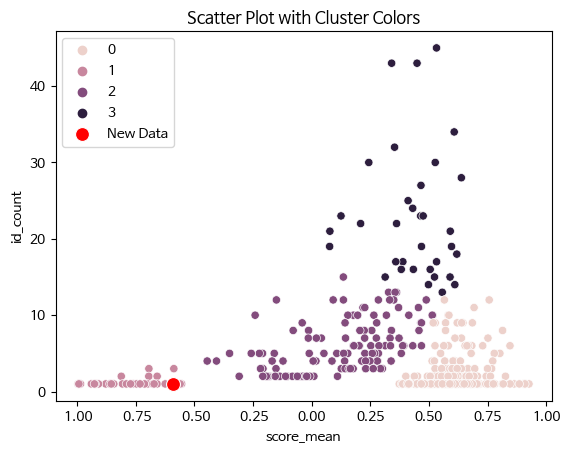

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'new scores mean'을 x축, 'id_count'를 y축으로 지정하고, 'cluster'를 hue로 사용하여 scatter plot 그리기
sns.scatterplot(x='score_mean', y='id_count', hue='cluster', data=tmp_df2)

# 새로운 데이터 포인트 추가
sns.scatterplot(x=new_df['score_mean'], y=new_df['id_count'], color='red', label='New Data', s=100)

# 그래프 제목 설정
plt.title('Scatter Plot with Cluster Colors')

# 그래프 표시
plt.show()


In [59]:

# 테스트
new_id = 'newcus**'
new_date = '2023-11-13'
new_score = 0.99
sentiment = 1
new_df = get_new_data_new_id(new_id, new_date, new_score, sentiment)

new_data_cluster_labels = kmeans.predict(new_df)

print('새로운 클러스터의 유형 :', new_data_cluster_labels)
new_df

새로운 클러스터의 유형 : [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,id_count,active_days,pos_num,neg_num,score_sum,score_mean,score_median,score_min,score_max,score_std
0,1,0,1,1,0.99,0.99,0.99,0.99,0.99,0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


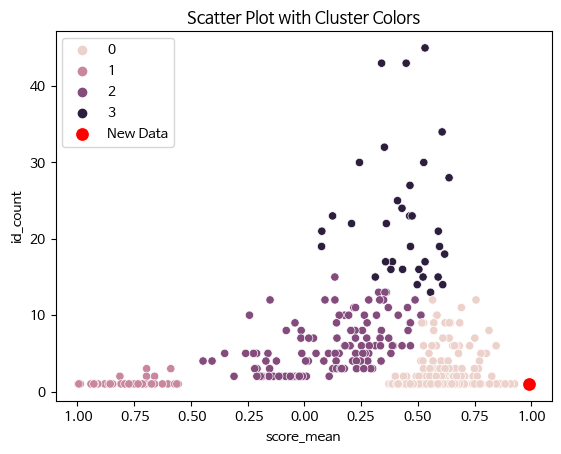

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'new scores mean'을 x축, 'id_count'를 y축으로 지정하고, 'cluster'를 hue로 사용하여 scatter plot 그리기
sns.scatterplot(x='score_mean', y='id_count', hue='cluster', data=tmp_df2)

# 새로운 데이터 포인트 추가
sns.scatterplot(x=new_df['score_mean'], y=new_df['id_count'], color='red', label='New Data', s=100)

# 그래프 제목 설정
plt.title('Scatter Plot with Cluster Colors')

# 그래프 표시
plt.show()


- 기존 ID에 데이터가 업데이트 되었을 때의 유형 예측

In [ ]:
# def get_updated_data_original_id(df, id, date, score, sentiment):
#     # 새로운 데이터를 담을 딕셔너리 생성
#     df.loc[df['ID'] == new_id, 'id_count'] += 1
#     df.loc[df['ID'] == new_id, 'max'] = date
#     df.loc[df['ID'] == new_id, 'active_days'] = df

import pandas as pd

def update_dataframe(df, new_id, new_date, new_score, sentiment):
    # 기존에 있는 아이디인지 확인
#     if new_id in df['ID'].values:
#         # 기존에 있던 아이디라면 기존의 데이터 프레임을 업데이트
#         df.loc[df['ID'] == new_id, 'id_count'] += 1
#         df.loc[df['ID'] == new_id, 'max'] = df.loc[df['ID'] == new_id, 'max'].max()
#         df.loc[df['ID'] == new_id, 'min'] = df.loc[df['ID'] == new_id, 'min'].min()
#         df.loc[df['ID'] == new_id, 'active_days'] += 1
#         df.loc[df['ID'] == new_id, 'pos_num'] += 1 if sentiment == 'positive' else 0
#         df.loc[df['ID'] == new_id, 'neg_num'] += 1 if sentiment == 'negative' else 0
#         df.loc[df['ID'] == new_id, 'score_sum'] += new_score
#         df.loc[df['ID'] == new_id, 'score_mean'] = df.loc[df['ID'] == new_id, 'score_sum'] / df.loc[df['ID'] == new_id, 'id_count']
#         df.loc[df['ID'] == new_id, 'score_median'] = df.loc[df['ID'] == new_id, 'score_sum'] / df.loc[df['ID'] == new_id, 'id_count']
#         df.loc[df['ID'] == new_id, 'score_min'] = df.loc[df['ID'] == new_id, 'score_min'].min()
#         df.loc[df['ID'] == new_id, 'score_max'] = df.loc[df['ID'] == new_id, 'score_max'].max()
#         df.loc[df['ID'] == new_id, 'score_std'] = df.loc[df['ID'] == new_id, 'score_std'].append(pd.Series([new_score])).std()

#         # 업데이트된 행 반환
#         updated_row = df.loc[df['ID'] == new_id]
#         return updated_row
#     else:
#         # 새로운 아이디라면 새로운 행 추가
#         new_row = {
#             'ID': new_id,
#             'id_count': 1,
#             'max': new_score,
#             'min': new_score,
#             'active_days': 1,
#             'pos_num': 1 if sentiment == 'positive' else 0,
#             'neg_num': 1 if sentiment == 'negative' else 0,
#             'score_sum': new_score,
#             'score_mean': new_score,
#             'score_median': new_score,
#             'score_min': new_score,
#             'score_max': new_score,
#             'score_std': pd.Series([new_score]).std()
#         }

#         # 데이터프레임에 새로운 행 추가
#         df = df.append(new_row, ignore_index=True)

#         # 새로운 행 반환
#         return df.loc[df['ID'] == new_id]

# # 사용 예시
# # 새로운 데이터프레임을 생성하고 첫 번째 행 추가
# df = pd.DataFrame(columns=['ID', 'id_count', 'max', 'min', 'active_days', 'pos_num', 'neg_num', 'score_sum', 'score_mean', 'score_median', 'score_min', 'score_max', 'score_std'])
# new_row = update_dataframe(df, 'user123', '2023-10-15', 0.878, 'positive')

# # 두 번째 행 추가
# new_row = update_dataframe(df, 'user123', '2023-10-16', 0.9, 'positive')

# # 업데이트된 데이터프레임 출력
# print(new_row)


# #활성 기간 추가
# df2['DATE'] = pd.to_datetime(df2['DATE'])
# review_periods = df2.groupby('ID')['DATE'].agg(['min', 'max'])
# review_periods['active_days'] = (review_periods['max'] - review_periods['min']).dt.days

# tmp_df2 = pd.merge(tmp_df2, review_periods, on='ID')

# #긍정/부정 리뷰 횟수 추가
# positive_num = df2.groupby('ID')['SENTIMENT'].sum()

# tmp_df2 = pd.merge(tmp_df2, positive_num, on='ID').rename(columns={'SENTIMENT': 'pos_num'})
# tmp_df2['neg_num'] = tmp_df2['id_count'] - tmp_df2['pos_num']

# # 온도 score 지표들 (sum, mean, median, min, max, std) 추가
# score_sum = df2.groupby('ID')['NEW_SCORE'].sum()
# tmp_df2 = pd.merge(tmp_df2, score_sum, on='ID').rename(columns={'NEW_SCORE': 'score_sum'})

# score_mean = df2.groupby('ID')['NEW_SCORE'].mean()
# tmp_df2 = pd.merge(tmp_df2, score_mean, on='ID').rename(columns={'NEW_SCORE': 'score_mean'})

# score_median = df2.groupby('ID')['NEW_SCORE'].median()
# tmp_df2 = pd.merge(tmp_df2, score_median, on='ID').rename(columns={'NEW_SCORE': 'score_median'})

# score_min = df2.groupby('ID')['NEW_SCORE'].min()
# tmp_df2 = pd.merge(tmp_df2, score_min, on='ID').rename(columns={'NEW_SCORE': 'score_min'})

# score_max = df2.groupby('ID')['NEW_SCORE'].max()
# tmp_df2 = pd.merge(tmp_df2, score_max, on='ID').rename(columns={'NEW_SCORE': 'score_max'})

# score_std = df2.groupby('ID')['NEW_SCORE'].std()
# tmp_df2 = pd.merge(tmp_df2, score_std, on='ID').rename(columns={'NEW_SCORE': 'score_std'})



- 온도 + 유형화 함께 확인

# --------- 참고 ----------

# 4) 누적 리뷰 토픽 분석 -> 빼는게 나을듯

In [ ]:
df2

In [ ]:
reviews = df2['REVIEW'].tolist()

In [ ]:
# from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
# from torch.utils.data import DataLoader, TensorDataset
# import torch
# from tqdm import tqdm
# import pandas as pd

# # 첫 번째 모델
# # zeroshot_model30000 = AutoModelForSequenceClassification.from_pretrained("/path/to/model").to('cuda')

# candidate_labels = ['맛', '양', '가격', '배달', '서비스']

# # 두 번째 모델
# model_name = "MoritzLaurer/mDeBERTa-v3-base-mnli-xnli"
# model = AutoModelForSequenceClassification.from_pretrained(model_name).to('cuda')
# tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False)
# classifier = pipeline("zero-shot-classification", model=model, tokenizer=tokenizer, device=0)

# # 데이터 전처리
# inputs = tokenizer(reviews, truncation=True, padding=True, return_tensors="pt").to('cuda')
# dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'])
# data_loader = DataLoader(dataset, batch_size=16, shuffle=False)

# # 모델 1 예측 - 우선 동일 모델로 작업함
# scores_from_model1 = []

# # with torch.no_grad():
# #     for batch in tqdm(data_loader):
# #         input_ids, attention_mask = (item.to('cuda') for item in batch)
# #         outputs = model_zeroshot(input_ids=input_ids, attention_mask=attention_mask)
# #         logits = outputs.logits
# #         probs = torch.sigmoid(logits).cpu().numpy()

# #         for prob in probs:
# #             scores = {candidate_labels[idx]: f"{val:.2f}" for idx, val in enumerate(prob)}
# #             scores_from_model1.append(scores)

# for review in tqdm(reviews):
#     output = classifier(review, candidate_labels, multi_label=True)
#     scores = {label: round(score, 2) for label, score in zip(output['labels'], output['scores'])}
#     scores_from_model1.append(scores)

# # 모델 2 예측
# scores_from_model2 = []

# for review in tqdm(reviews):
#     output = classifier(review, candidate_labels, multi_label=True)
#     scores = {label: round(score, 2) for label, score in zip(output['labels'], output['scores'])}
#     scores_from_model2.append(scores)


In [ ]:
# new_label_scores_list = []
# new_predicted_labels_list = []

# for score1, score2 in zip(scores_from_model1, scores_from_model2):
#     averaged_scores = {}
#     new_labels = []
#     new_scores = {}
#     service_scores = []

#     for label in score1.keys():
#         averaged_score = (float(score1[label]) + float(score2[label])) / 2

#         if label == '맛':
#             new_scores['quality'] = averaged_score
#             if averaged_score >= 0.35:
#                 new_labels.append('quality')

#         elif label == '양':
#             new_scores['quantity'] = averaged_score
#             if averaged_score >= 0.35:
#                 new_labels.append('quantity')

#         elif label in ['서비스', '배달', '가격']:
#             service_scores.append(averaged_score)

#     if service_scores:
#         avg_service_score = sum(service_scores) / len(service_scores)
#         new_scores['service'] = avg_service_score
#         if avg_service_score >= 0.35:
#             new_labels.append('service')

#     new_label_scores_list.append(", ".join([f"{k}: {v:.2f}" for k, v in new_scores.items()]))
#     new_predicted_labels_list.append(", ".join(new_labels))


In [ ]:
# # 결과를 새로운 데이터프레임으로 저장
# new_result_df = pd.DataFrame({
#     'Review': reviews,
#     'Label_Scores': new_label_scores_list,
#     'New_Predicted_Labels': new_predicted_labels_list
# })

# new_result_df

In [ ]:
# new_result_df.to_csv('df2_label_result_df.csv', index=False)
new_result_df = pd.read_csv('df2_label_result_df.csv')

In [ ]:
new_result_df = new_result_df.astype(str)
new_result_df

In [ ]:
quality_score = []
quantity_score = []
service_score = []

for text in new_result_df['Label_Scores']:
    quality_value = re.search(r'quality: (\d+\.\d+)', text).group(1)
    quality_score.append(quality_value)

    quantity_value = re.search(r'quantity: (\d+\.\d+)', text).group(1)
    quantity_score.append(quantity_value)

    service_value = re.search(r'service: (\d+\.\d+)', text).group(1)
    service_score.append(service_value)

# 각 score의 합 계산
total_quality_score = sum(float(score) for score in quality_score)
total_quantity_score = sum(float(score) for score in quantity_score)
total_service_score = sum(float(score) for score in service_score)


In [ ]:
# 원형 그래프 그리기
labels = ['Quality', 'Quantity', 'Service']
sizes = [total_quality_score, total_quantity_score, total_service_score]
pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors = pastel_colors)
plt.axis('equal')  # 원형 그래프를 원형으로 유지하기 위해 필요

plt.title('Score Distribution')
plt.show()

In [ ]:
# new_result_df = pd.concat([new_result_df, df2[['SENTIMENT','SCORE']]],axis=1)
# new_result_df.head(5)

- 누적 통계 (probability 누적. 이걸로 대체하는게 나을듯)

In [ ]:
# mask = new_result_df['SENTIMENT'] == 1
# pos_new_result_df = new_result_df[mask]

In [ ]:
# mask = new_result_df['SENTIMENT'] == 0
# neg_new_result_df = new_result_df[mask]

In [ ]:
# import re

# quality_reviews = []
# quantity_reviews = []
# service_reviews = []

# # new_result_df의 각 행을 검사하면서 리스트에 담기
# for index, row in new_result_df.iterrows():
#     review = row['Review']
#     labels = row['New_Predicted_Labels']

#     if 'quality' in labels:
#         quality_reviews.append(review)
#     if 'quantity' in labels:
#         quantity_reviews.append(review)
#     if 'service' in labels:
#         service_reviews.append(review)

# len(quality_reviews), len(quantity_reviews), len(service_reviews)


- 키워드 추출

In [ ]:
# !pip install kiwipiepy

In [ ]:
# from kiwipiepy import Kiwi
# kiwi = Kiwi()

# analyzed = kiwi.analyze("아버지께서 오랜지병으로 돌아가셨습니다. ")
# analyzed

In [ ]:
# from tqdm import tqdm

# def get_kiwis(review_list):

#     kiwi_list = []
#     for review in tqdm(review_list):
#         result = kiwi.analyze(review)
#         for token, pos, _,_ in result[0][0]:
#             if pos in ['VA','XR','NNR','NNP']: #'NNG','VA','VV',
#                 kiwi_list.append(token)

#     return kiwi_list

In [ ]:
# kiwi_quality_review = get_kiwis(quality_reviews)
# kiwi_quantity_review = get_kiwis(quantity_reviews)
# kiwi_service_review = get_kiwis(service_reviews)

# len(kiwi_quality_review), len(kiwi_quantity_review), len(kiwi_service_review)

- 워드 클라우드

In [ ]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# def generate_wordcloud(sentences):
#     # 리스트에 있는 문장들을 하나의 문자열로 합치기
#     text_data = ' '.join(sentences)

#     plt.rcParams.update(plt.rcParamsDefault)
#     plt.rc('font', family='NanumBarunGothic')

#     # 워드클라우드 객체 생성
#     wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/System/Library/Fonts/NanumBarunGothic.ttf').generate(text_data)

#     # 워드클라우드 시각화
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off')  # 축 제거
#     plt.show()


In [ ]:
# kiwi_quality_review

# filtered_words = [word for word in kiwi_service_review if len(word) > 1]

# generate_wordcloud(filtered_words)